In [49]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
data = pd.read_csv('./final/굴_raw.csv')

In [86]:
data.head()

,Unnamed: 0,Unnamed: 0.1,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,일시
0,0,0,(선)깐굴,삼천포,소,box,2.0,3.7,11000,11000,11000,2006.04.04
1,1,1,(선)깐굴,고흥,소,box,30.0,4.0,17000,17000,17000,2006.04.04
2,2,2,(선)깐굴,삼천포,소,box,30.0,2.9,17000,17000,17000,2006.04.04
3,3,3,(선)깐굴,북한,소,box,30.0,2.0,9000,9000,9000,2006.04.04
4,4,4,(선)깐굴,삼천포,소,box,128.0,2.0,13000,8000,10000,2006.04.04


In [87]:
data['최종수량'] = data['수량']*data['중량']

In [88]:
data

,Unnamed: 0,Unnamed: 0.1,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,일시,최종수량
0,0,0,(선)깐굴,삼천포,소,box,2.0,3.7,11000,11000,11000,2006.04.04,7.4
1,1,1,(선)깐굴,고흥,소,box,30.0,4.0,17000,17000,17000,2006.04.04,120.0
2,2,2,(선)깐굴,삼천포,소,box,30.0,2.9,17000,17000,17000,2006.04.04,87.0
3,3,3,(선)깐굴,북한,소,box,30.0,2.0,9000,9000,9000,2006.04.04,60.0
4,4,4,(선)깐굴,삼천포,소,box,128.0,2.0,13000,8000,10000,2006.04.04,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89689,1116,2,(선)깐굴,통영,소,box,45.0,1.9,18000,15200,16100,2021.04.08,85.5
89690,1117,3,(선)깐굴,통영,소,box,10.0,1.7,16500,16200,16400,2021.04.08,17.0
89691,1118,4,(선)깐굴,통영,소,box,6.0,1.3,11000,11000,11000,2021.04.08,7.8
89692,1119,5,(선)깐굴,통영,소,box,30.0,2.0,16000,15500,15800,2021.04.08,60.0


In [89]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [90]:
data.groupby('산지').sum().sort_values('최종수량', ascending=False).head(20)

,수량,중량,낙찰고가,낙찰저가,평균가,최종수량
산지,,,,,,
통영,6294244.0,114563.85,610553400,547516100,576771800,14158633.6
사천,1470545.0,39470.40,280821200,256120200,268890500,4436569.6
남해,1556662.0,34627.90,284465900,247178300,264362200,4421865.7
마산,430422.0,40620.05,125011100,119524600,122970100,3481142.7
삼천포,990249.0,35071.80,242945500,221694300,233002900,2889161.3
고흥,273995.0,17322.40,140290000,124013160,129743500,1072719.0
영광,9200.0,4858.80,52294200,47264200,49169700,109483.0
여수,17424.0,5340.30,16303500,15617600,15934800,105317.6
고성,23945.0,3480.90,8563050,8366950,8464400,98124.8


In [91]:
data['year'] = data['일시'].str.split('.').str.get(0)
data['month'] = data['일시'].str.split('.').str.get(1)
data['day'] = data['일시'].str.split('.').str.get(2)

In [92]:
data =data.drop(['규격','포장'], axis=1)

In [93]:
data_f = data.drop(['수량', '중량','일시','낙찰고가','낙찰저가'], axis=1)

In [94]:
data_f

,어종,산지,평균가,최종수량,year,month,day
0,(선)깐굴,삼천포,11000,7.4,2006,04,04
1,(선)깐굴,고흥,17000,120.0,2006,04,04
2,(선)깐굴,삼천포,17000,87.0,2006,04,04
3,(선)깐굴,북한,9000,60.0,2006,04,04
4,(선)깐굴,삼천포,10000,256.0,2006,04,04
...,...,...,...,...,...,...,...
89689,(선)깐굴,통영,16100,85.5,2021,04,08
89690,(선)깐굴,통영,16400,17.0,2021,04,08
89691,(선)깐굴,통영,11000,7.8,2021,04,08
89692,(선)깐굴,통영,15800,60.0,2021,04,08


In [95]:
year_g = data.groupby('year').sum()
year_g['최종수량']

year
2006    1200992.2
2007    2706401.5
2008    2765140.7
2009    2591978.4
2010    2834437.4
2011    2729133.9
2012    2840560.1
2013    2218519.7
2014    2308109.0
2015    1939169.9
2016    1748982.6
2017    1678898.2
2018    1372835.4
2019     942729.1
2020     743211.6
2021     267651.5
Name: 최종수량, dtype: float64

In [96]:
year_mean = data.groupby('year').mean()['평균가'].round(2)

In [97]:
year_g.index

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object', name='year')

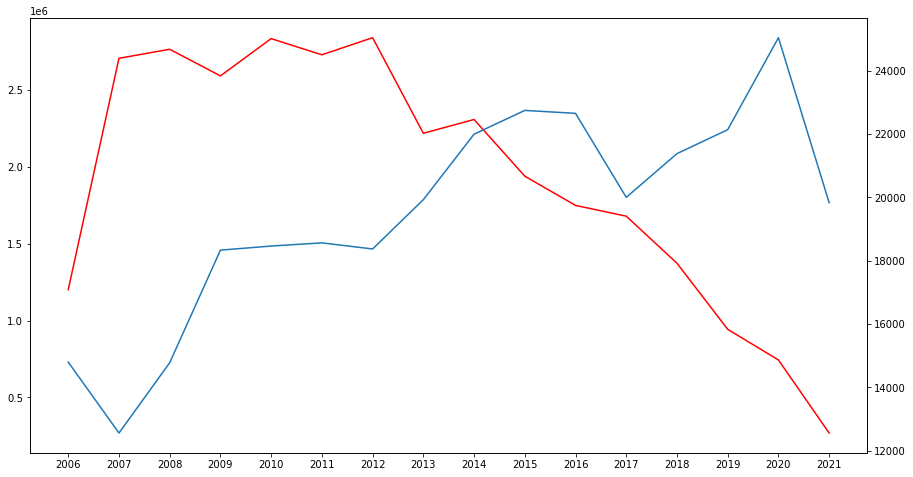

In [98]:
# 연 공급량과 가격 간의 상관관계가 있을까?
plt.rcParams['figure.figsize'] = (15, 8)
fig, ax1 = plt.subplots()
ax1.plot(year_g.index,year_g['최종수량'],'red')
ax2 = ax1.twinx()
ax2.plot(year_g.index,year_mean)
plt.show()

In [99]:
data_f.groupby('어종').sum().sort_values('최종수량',ascending=False)

,평균가,최종수량
어종,,
(선)깐굴,1432038100,22083344.7
(활)바위굴,85036700,6818574.4
(선)바위굴,48104700,1024059.0
(가공)봉굴,63677300,735372.0
(냉건)굴비,65121400,162353.2
(활)가시굴,2967200,48993.5
(가공)염굴비,1747700,7762.0
(냉)깐굴,1511000,4598.0
(활)토굴,172100,1813.9


In [100]:
data_f

,어종,산지,평균가,최종수량,year,month,day
0,(선)깐굴,삼천포,11000,7.4,2006,04,04
1,(선)깐굴,고흥,17000,120.0,2006,04,04
2,(선)깐굴,삼천포,17000,87.0,2006,04,04
3,(선)깐굴,북한,9000,60.0,2006,04,04
4,(선)깐굴,삼천포,10000,256.0,2006,04,04
...,...,...,...,...,...,...,...
89689,(선)깐굴,통영,16100,85.5,2021,04,08
89690,(선)깐굴,통영,16400,17.0,2021,04,08
89691,(선)깐굴,통영,11000,7.8,2021,04,08
89692,(선)깐굴,통영,15800,60.0,2021,04,08


In [101]:
index_g = data_f[(data_f['어종']=='(가공)염굴비') | (data_f['어종']=='(냉건)굴비')].index

In [102]:
data_f = data_f.drop(index_g,axis=0)

In [103]:
data_f.groupby('어종').sum().sort_values('최종수량',ascending=False)

,평균가,최종수량
어종,,
(선)깐굴,1432038100,22083344.7
(활)바위굴,85036700,6818574.4
(선)바위굴,48104700,1024059.0
(가공)봉굴,63677300,735372.0
(활)가시굴,2967200,48993.5
(냉)깐굴,1511000,4598.0
(활)토굴,172100,1813.9
(선)굴,299400,748.0
(냉)굴,80000,656.0


In [104]:
data_f.to_csv('./final/굴_final.csv')

In [105]:
data_f

,어종,산지,평균가,최종수량,year,month,day
0,(선)깐굴,삼천포,11000,7.4,2006,04,04
1,(선)깐굴,고흥,17000,120.0,2006,04,04
2,(선)깐굴,삼천포,17000,87.0,2006,04,04
3,(선)깐굴,북한,9000,60.0,2006,04,04
4,(선)깐굴,삼천포,10000,256.0,2006,04,04
...,...,...,...,...,...,...,...
89689,(선)깐굴,통영,16100,85.5,2021,04,08
89690,(선)깐굴,통영,16400,17.0,2021,04,08
89691,(선)깐굴,통영,11000,7.8,2021,04,08
89692,(선)깐굴,통영,15800,60.0,2021,04,08


In [106]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89001 entries, 0 to 89693
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어종      89001 non-null  object 
 1   산지      89001 non-null  object 
 2   평균가     89001 non-null  int64  
 3   최종수량    89001 non-null  float64
 4   year    89001 non-null  object 
 5   month   89001 non-null  object 
 6   day     89001 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.4+ MB


In [107]:
data_f['date'] = data_f['year'].str.cat(data_f['month'], sep=".")

In [108]:
data_f

,어종,산지,평균가,최종수량,year,month,day,date
0,(선)깐굴,삼천포,11000,7.4,2006,04,04,2006.04
1,(선)깐굴,고흥,17000,120.0,2006,04,04,2006.04
2,(선)깐굴,삼천포,17000,87.0,2006,04,04,2006.04
3,(선)깐굴,북한,9000,60.0,2006,04,04,2006.04
4,(선)깐굴,삼천포,10000,256.0,2006,04,04,2006.04
...,...,...,...,...,...,...,...,...
89689,(선)깐굴,통영,16100,85.5,2021,04,08,2021.04
89690,(선)깐굴,통영,16400,17.0,2021,04,08,2021.04
89691,(선)깐굴,통영,11000,7.8,2021,04,08,2021.04
89692,(선)깐굴,통영,15800,60.0,2021,04,08,2021.04


In [109]:
data_2 = data_f[(data_f['year']=='2020')|(data_f['year']=='2019')]
data_2

,어종,산지,평균가,최종수량,year,month,day,date
82022,(선)깐굴,삼천포,27000,62.7,2019,01,02,2019.01
82023,(선)깐굴,통영,28600,140.0,2019,01,02,2019.01
82024,(선)깐굴,통영,17700,828.0,2019,01,02,2019.01
82025,(선)깐굴,남해,29500,425.6,2019,01,02,2019.01
82026,(선)깐굴,삼천포,28700,249.0,2019,01,02,2019.01
...,...,...,...,...,...,...,...,...
88568,(선)깐굴,삼천포,25500,448.0,2020,12,31,2020.12
88569,(활)바위굴,여수,12000,20.0,2020,12,31,2020.12
88570,(활)바위굴,삼천포,6900,100.0,2020,12,31,2020.12
88571,(활)바위굴,마산,13000,200.0,2020,12,31,2020.12


In [110]:
month_Q = data_2.groupby('date').sum()['최종수량']
month_Q

date
2019.01    244357.6
2019.02    118670.8
2019.03     50594.8
2019.04     20405.4
2019.05      6317.4
2019.06      3057.8
2019.07      2739.3
2019.08      2600.3
2019.09      8092.1
2019.10     45175.0
2019.11    243410.4
2019.12    197308.2
2020.01    145559.7
2020.02     85920.1
2020.03     42316.9
2020.04     16406.3
2020.05      7017.2
2020.06      2637.3
2020.07      2482.0
2020.08      2088.8
2020.09      7020.4
2020.10     56986.7
2020.11    204125.8
2020.12    170644.4
Name: 최종수량, dtype: float64

In [111]:
month_P = data_2.groupby('date').mean().round(2)['평균가']

In [112]:
month_Q.values

array([244357.6, 118670.8,  50594.8,  20405.4,   6317.4,   3057.8,
         2739.3,   2600.3,   8092.1,  45175. , 243410.4, 197308.2,
       145559.7,  85920.1,  42316.9,  16406.3,   7017.2,   2637.3,
         2482. ,   2088.8,   7020.4,  56986.7, 204125.8, 170644.4])

In [113]:
month_P.index

Index(['2019.01', '2019.02', '2019.03', '2019.04', '2019.05', '2019.06',
       '2019.07', '2019.08', '2019.09', '2019.10', '2019.11', '2019.12',
       '2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12'],
      dtype='object', name='date')

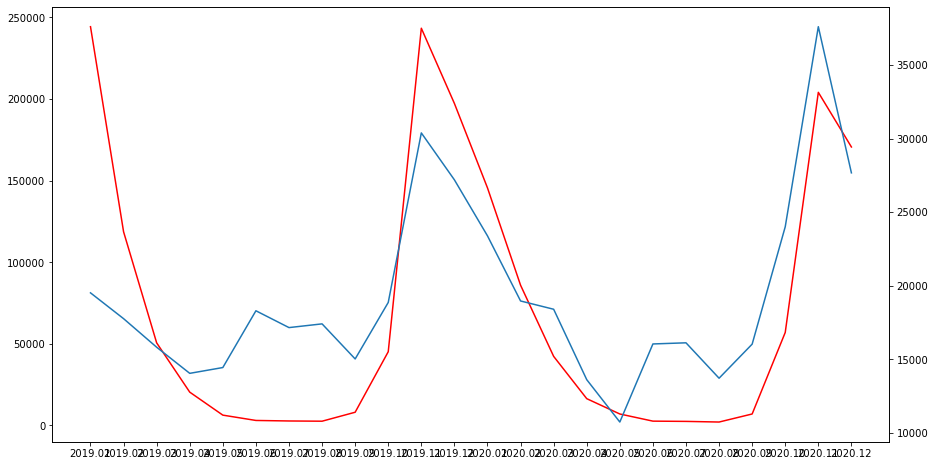

In [114]:
# 월 공급량과 가격 간의 상관관계가 있을까?
plt.rcParams['figure.figsize'] = (15, 8)
fig, ax1 = plt.subplots()
ax1.plot(month_P.index,month_Q,'red')
ax2 = ax1.twinx()
ax2.plot(month_P.index,month_P)
plt.show()

In [115]:
sea = pd.read_csv('./final/해상기상_위치.csv')

In [20]:
sea.groupby('위치').sum()

,지점,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
위치,,,,,,,,,,,,
가거도,10224027,2475.9,423739.5,27270.0,5611.6,6427.2,859.5,532.1,813.5,1368.0,2561.4,3550.0
거문도,158036450,41874.0,7035105.5,504174.0,106649.8,120150.4,11229.0,6257.0,9149.1,16945.6,60446.7,119642.4
거제도,161867592,43678.8,7279910.8,501164.0,108915.4,128261.6,11929.5,6533.6,9277.0,17612.8,59620.5,110040.9
덕적도,159458715,30374.3,6957894.2,495216.0,80773.7,86684.4,6255.8,3798.7,6242.9,10415.9,31957.2,47383.5
동해,138996240,34674.1,6150649.1,439261.0,88677.2,107899.2,12174.7,6909.8,9973.4,18150.7,33224.1,42283.7
마라도,91788264,27651.3,4129005.8,306433.0,72274.4,79851.7,8966.9,5468.7,7756.8,13100.9,23809.2,31927.8
부안,41975912,9677.0,1875519.8,141881.0,25689.4,27918.8,2708.5,1665.3,2539.2,4235.3,9618.7,12661.5
서귀포,41933430,12945.4,1876039.4,137332.0,33600.4,39785.4,4031.2,2462.8,3429.9,5822.4,11075.0,14725.4
서해170,11428365,3220.6,515598.2,28801.0,5900.2,7251.4,861.7,516.4,797.2,1336.7,3168.1,3730.7


In [116]:
data_f

,어종,산지,평균가,최종수량,year,month,day,date
0,(선)깐굴,삼천포,11000,7.4,2006,04,04,2006.04
1,(선)깐굴,고흥,17000,120.0,2006,04,04,2006.04
2,(선)깐굴,삼천포,17000,87.0,2006,04,04,2006.04
3,(선)깐굴,북한,9000,60.0,2006,04,04,2006.04
4,(선)깐굴,삼천포,10000,256.0,2006,04,04,2006.04
...,...,...,...,...,...,...,...,...
89689,(선)깐굴,통영,16100,85.5,2021,04,08,2021.04
89690,(선)깐굴,통영,16400,17.0,2021,04,08,2021.04
89691,(선)깐굴,통영,11000,7.8,2021,04,08,2021.04
89692,(선)깐굴,통영,15800,60.0,2021,04,08,2021.04


In [117]:
data_f.groupby('어종').mean().round(2).sort_values('평균가',ascending=False)

,평균가,최종수량
어종,,
(활)참굴,38200.00,140.00
(선)토굴,36000.00,180.00
(가공)봉굴,30008.15,346.55
(선)굴,29940.00,74.80
(냉)굴,26666.67,218.67
(냉)깐굴,25183.33,76.63
(활)굴,22600.00,11.30
(선)바위굴,18558.91,395.08
(선)깐굴,18357.34,283.09


In [118]:
data_f.groupby('어종').sum().sort_values('최종수량',ascending=False)

,평균가,최종수량
어종,,
(선)깐굴,1432038100,22083344.7
(활)바위굴,85036700,6818574.4
(선)바위굴,48104700,1024059.0
(가공)봉굴,63677300,735372.0
(활)가시굴,2967200,48993.5
(냉)깐굴,1511000,4598.0
(활)토굴,172100,1813.9
(선)굴,299400,748.0
(냉)굴,80000,656.0


In [119]:
# 1kg당 금액
data_f['1kg price'] = (data_f['평균가']/data['중량']).round(2)

In [120]:
data_f.groupby('어종').mean().sort_values('평균가',ascending=False).round(1)

,평균가,최종수량,1kg price
어종,,,
(활)참굴,38200.0,140.0,3820.0
(선)토굴,36000.0,180.0,3600.0
(가공)봉굴,30008.2,346.5,3342.6
(선)굴,29940.0,74.8,10877.3
(냉)굴,26666.7,218.7,3777.8
(냉)깐굴,25183.3,76.6,3222.9
(활)굴,22600.0,11.3,13743.6
(선)바위굴,18558.9,395.1,2044.1
(선)깐굴,18357.3,283.1,7894.5


In [121]:
data_f

,어종,산지,평균가,최종수량,year,month,day,date,1kg price
0,(선)깐굴,삼천포,11000,7.4,2006,04,04,2006.04,2972.97
1,(선)깐굴,고흥,17000,120.0,2006,04,04,2006.04,4250.00
2,(선)깐굴,삼천포,17000,87.0,2006,04,04,2006.04,5862.07
3,(선)깐굴,북한,9000,60.0,2006,04,04,2006.04,4500.00
4,(선)깐굴,삼천포,10000,256.0,2006,04,04,2006.04,5000.00
...,...,...,...,...,...,...,...,...,...
89689,(선)깐굴,통영,16100,85.5,2021,04,08,2021.04,8473.68
89690,(선)깐굴,통영,16400,17.0,2021,04,08,2021.04,9647.06
89691,(선)깐굴,통영,11000,7.8,2021,04,08,2021.04,8461.54
89692,(선)깐굴,통영,15800,60.0,2021,04,08,2021.04,7900.00


In [122]:
index_d = data_f[(data_f['어종']=='(가공)염굴비') | (data_f['어종']=='(냉건)굴비')].index

In [123]:
data_f = data_f.drop(index_g,axis=0)

KeyError: '[   80   101   218   219   362   385   460   642  1025  2531  7938  9285\n 10134 10378 10379 10460 10546 10789 10790 11588 11589 12435 13078 13079\n 13599 14825 14826 14837 14838 14851 14852 14862 14863 14885 14886 14897\n 14898 14908 14909 14919 14920 14929 14930 14943 14944 14956 14957 14969\n 14970 14992 14993 15002 15003 15012 15019 15020 15029 15030 15036 15037\n 15044 15052 15058 15059 15066 15067 15073 15074 15080 15081 15090 15091\n 15112 15113 15121 15128 15129 15136 15137 15145 15146 15157 15158 15165\n 15166 15174 15175 15181 15192 15193 15209 15210 15211 15212 15219 15220\n 15230 15231 15239 15249 15250 15266 15271 15272 15277 15284 15285 15295\n 15304 15332 15333 15441 15462 15602 15964 15965 16579 16580 16617 16618\n 16655 16656 16731 16732 16821 16822 16871 16918 16919 16980 16981 17154\n 17155 17286 17287 17349 17350 17412 17413 17537 17538 17592 17593 17655\n 17656 17717 17776 17932 17933 17985 18077 18078 18224 18225 18273 18274\n 18322 18323 18373 18374 18475 18476 18520 18521 18567 18568 18612 18613\n 18666 18667 18769 18770 18868 18869 18955 18956 19051 19052 19283 19433\n 19475 19569 19570 19619 19620 19658 19659 19690 19691 19729 19768 19816\n 19867 19991 19992 20039 20721 20722 20796 20914 20915 20951 20952 22932\n 22933 22934 22935 22936 22937 27942 27943 27944 27945 27946 28005 28006\n 28007 28008 28009 28010 28068 28554 28555 28556 28557 30982 31644 31645\n 31646 31647 31648 31649 34053 38149 38976 39148 39252 39332 39605 40327\n 41308 41358 41563 41564 41565 41566 41704 41752 41799 41800 41848 41977\n 41978 42023 42110 42111 42241 42283 42322 42364 42409 42455 42456 42457\n 42504 42549 42550 42598 42599 42647 42695 42803 43100 43306 43307 43308\n 43777 43778 43862 43945 44431 44432 44433 44625 44720 44843 44844 45075\n 45127 45128 45244 45245 45246 45271 45272 45542 45571 45603 45640 45668\n 45770 45785 45790 45827 45857 45887 45895 45915 45944 45984 46002 46033\n 46034 46058 46074 46156 46157 46179 46180 46220 46221 46288 46319 46354\n 46404 46424 46433 46443 46455 46477 46487 46488 46497 46510 46511 46528\n 46529 46541 46992 47323 47324 47325 47595 47596 47597 49580 49581 49582\n 50075 50076 50117 50154 50155 50195 50196 50197 50232 50397 50424 50465\n 50466 50467 50468 50469 50470 50507 50508 50509 50510 50511 50512 50513\n 50551 50587 50627 50628 50629 50630 50631 50632 50633 50634 50668 50669\n 50670 50671 50672 50673 50674 50675 50704 50705 50706 50747 50748 50822\n 51158 51159 51185 51449 51450 51514 51694 51695 51696 51732 51903 51904\n 51918 52030 52031 52032 52106 52214 52274 52275 52276 52302 52303 52311\n 52317 52413 52418 52419 52420 52421 52422 52425 52431 52463 52467 52480\n 52485 52536 52541 52546 52547 52562 52591 52595 52596 52597 52598 52601\n 52602 52603 52604 52605 52609 52613 52624 52625 52626 52627 52628 52629\n 52635 52636 52637 52638 52639 52640 52641 52664 52665 52666 52667 52668\n 52669 52676 52677 52678 52683 52684 52685 52686 52687 52688 52692 52693\n 52694 52702 52707 52716 52747 52748 52755 52756 52765 52766 52767 52790\n 52932 53203 53457 53688 54265 54266 54471 54693 55096 55504 55713 55758\n 55912 55951 55991 56076 56077 56078 56167 56209 56210 56211 56255 56606\n 56714 56781 56853 57103 57104 57277 57307 57308 57684 57685 57686 57687\n 57713 57833 58149 58150 58151 58212 58216 58221 58222 58265 58301 58341\n 58395 58396 58397 58451 58452 58453 58454 58464 58467 58475 58476 58518\n 58519 58520 58577 58617 58618 58619 58620 58636 58642 58643 58644 58645\n 58738 58805 59548 59549 59550 60305 60343 60879 61190 61717 62137 62138\n 62139 62209 62210 62211 62212 62418 62503 62536 62537 62573 62611 62612\n 62729 62896 63219 63444 63517 63804 63843 63844 63940 63967 63993 63994\n 64062 64079 64130 64131 64132 64133 64138 64153 64154 64155 64156 64226\n 64302 64303 64304 64305 64306 64349 64350 64351 64352 64353 64365 64746\n 65613 66155 66156 66157 66158 66637 66638 66639 66640 66676 67112 67279\n 67354 67355 67453 67454 67489 67567 67568 67569 67708 68176 68798 69083\n 69084 69157 69173 69229 69230 69275 69321 69340 69444 69464 69474 69511\n 69536 69557 69585 69605 69616 69628 69636 69640 69641 69642 69643 69644\n 69650 69651 69652 69653 69654 69713 69866 69867 69868 69960 71193 71194\n 71195 72794 73094 74877 74988 75862 78516 79887 87020] not found in axis'

In [124]:
data_f

,어종,산지,평균가,최종수량,year,month,day,date,1kg price
0,(선)깐굴,삼천포,11000,7.4,2006,04,04,2006.04,2972.97
1,(선)깐굴,고흥,17000,120.0,2006,04,04,2006.04,4250.00
2,(선)깐굴,삼천포,17000,87.0,2006,04,04,2006.04,5862.07
3,(선)깐굴,북한,9000,60.0,2006,04,04,2006.04,4500.00
4,(선)깐굴,삼천포,10000,256.0,2006,04,04,2006.04,5000.00
...,...,...,...,...,...,...,...,...,...
89689,(선)깐굴,통영,16100,85.5,2021,04,08,2021.04,8473.68
89690,(선)깐굴,통영,16400,17.0,2021,04,08,2021.04,9647.06
89691,(선)깐굴,통영,11000,7.8,2021,04,08,2021.04,8461.54
89692,(선)깐굴,통영,15800,60.0,2021,04,08,2021.04,7900.00


In [126]:
data_f.groupby('어종').mean()

,평균가,최종수량,1kg price
어종,,,
(가공)봉굴,30008.152686,346.546654,3342.631475
(냉)굴,26666.666667,218.666667,3777.776667
(냉)깐굴,25183.333333,76.633333,3222.916500
(냉)바위굴,15000.000000,100.000000,1500.000000
(선)굴,29940.000000,74.800000,10877.333000
(선)깐굴,18357.344665,283.087140,7894.457878
(선)바위굴,18558.912037,395.084491,2044.051613
(선)토굴,36000.000000,180.000000,3600.000000
(활)가시굴,11821.513944,195.193227,1175.305378


In [127]:
data_f.to_csv('./final/굴_final.csv')

In [131]:
data_f.groupby('어종').sum().sort_values(['최종수량'], ascending=False)

,평균가,최종수량,1kg price
어종,,,
(선)깐굴,1432038100,22083344.7,6.158388e+08
(활)바위굴,85036700,6818574.4,8.583915e+06
(선)바위굴,48104700,1024059.0,5.298182e+06
(가공)봉굴,63677300,735372.0,7.093064e+06
(활)가시굴,2967200,48993.5,2.950016e+05
(냉)깐굴,1511000,4598.0,1.933750e+05
(활)토굴,172100,1813.9,1.670721e+04
(선)굴,299400,748.0,1.087733e+05
(냉)굴,80000,656.0,1.133333e+04


In [151]:
data_f[data_f['어종'] == '(선)깐굴']

,어종,산지,평균가,최종수량,year,month,day,date,1kg price
0,(선)깐굴,삼천포,11000,7.4,2006,04,04,2006.04,2972.97
1,(선)깐굴,고흥,17000,120.0,2006,04,04,2006.04,4250.00
2,(선)깐굴,삼천포,17000,87.0,2006,04,04,2006.04,5862.07
3,(선)깐굴,북한,9000,60.0,2006,04,04,2006.04,4500.00
4,(선)깐굴,삼천포,10000,256.0,2006,04,04,2006.04,5000.00
...,...,...,...,...,...,...,...,...,...
89688,(선)깐굴,여수,8900,39.9,2021,04,08,2021.04,4684.21
89689,(선)깐굴,통영,16100,85.5,2021,04,08,2021.04,8473.68
89690,(선)깐굴,통영,16400,17.0,2021,04,08,2021.04,9647.06
89691,(선)깐굴,통영,11000,7.8,2021,04,08,2021.04,8461.54


In [148]:
data_f[(data_f['어종'] == '(선)깐굴') | (data_f['어종'] == '(활)바위굴')]

,어종,산지,평균가,최종수량,year,month,day,date,1kg price
0,(선)깐굴,삼천포,11000,7.4,2006,04,04,2006.04,2972.97
1,(선)깐굴,고흥,17000,120.0,2006,04,04,2006.04,4250.00
2,(선)깐굴,삼천포,17000,87.0,2006,04,04,2006.04,5862.07
3,(선)깐굴,북한,9000,60.0,2006,04,04,2006.04,4500.00
4,(선)깐굴,삼천포,10000,256.0,2006,04,04,2006.04,5000.00
...,...,...,...,...,...,...,...,...,...
89688,(선)깐굴,여수,8900,39.9,2021,04,08,2021.04,4684.21
89689,(선)깐굴,통영,16100,85.5,2021,04,08,2021.04,8473.68
89690,(선)깐굴,통영,16400,17.0,2021,04,08,2021.04,9647.06
89691,(선)깐굴,통영,11000,7.8,2021,04,08,2021.04,8461.54


In [153]:
filter = data_f[data_f['어종'] == '(선)깐굴']

In [154]:
filter.groupby('어종').sum().sort_values(['최종수량'], ascending=False)

,평균가,최종수량,1kg price
어종,,,
(선)깐굴,1432038100,22083344.7,6.158388e+08


In [155]:
filter.groupby('어종').mean().sort_values(['최종수량'], ascending=False)

,평균가,최종수량,1kg price
어종,,,
(선)깐굴,18357.344665,283.08714,7894.457878


In [157]:
filter.to_csv('./final/깐굴.csv')